# トークトリアル 11 （パートC）

# オンラインAPI/サービスを使った構造に基づくCADD

__Developed at AG Volkamer, Charité__

Dr. Jaime Rodríguez-Guerra, Dominique Sydow

## このトークトリアルの目的

>  これは「オンラインWebサービス」についてのトークトリアルのパートCです。:
>
> - 11a. キナーゼ阻害剤の候補をKLIFとPubChemで検索
> - 11b. 11aで取得した候補化合物をターゲットタンパク質に対してドッキング
> - __11c. 結果を評価し既知のデータと比較__

入力構造を取得し、ドッキングが終わったので、結果が役に立つものかどうか評価します。

## 学習の目標

### 理論

- タンパク質ーリガンド相互作用
- ドッキングの偽陽性

### 実践

- 結果の可視化
- 自動化した解析の実行

## レファレンス

- タンパク質ーリガンド相互作用に関するレビュー([_Int. J. Mol. Sci._ (2016), __17__, 144](https://www.mdpi.com/1422-0067/17/2/144))
- PDBデータベースにおける非共有性結合相互作用の系統的な解析 ([_M. Med. Chem. Commun._ (2017), __8__, 1970-1981](https://pubs.rsc.org/en/content/articlelanding/2017/md/c7md00381a#!divAbstract))
- タンパク質ーリガンド相互作用が医薬品の作用にとって鍵となることについての次の書籍の中の章（[Klebe G. (eds) Drug Design. Springer, Berlin, Heidelberg. DOI: 10.1007/978-3-642-17907-5_4](https://link.springer.com/referenceworkentry/10.1007%2F978-3-642-17907-5_4)）
* Notebookのためのインタラクティブな可視化ソフト、NGLView ([_Bioinformatics_ (2018), __34__, 1241–124](https://doi.org/10.1093/bioinformatics/btx789))
* 自動的にタンパク質ーリガンド相互作用を見つけるためのPLIP([_Nucl. Acids Res._ (2015), __43__, W1, W443-W447](https://academic.oup.com/nar/article/43/W1/W443/2467865))

***

## 理論

### タンパク質ーリガンド相互作用

リガンドの結合は、リガンドとタンパク質ポケットの表面との間、あるいはタンパク質ータンパク質境界面における非共有結合性相互作用によって主に支配されています。このプロセスは、静電的相補性と形状相補性、誘導適合（inducued fitting）、脱溶媒和過程、その他に応じて変化するものです。

文献からいくつか引用します。

[José L. Medina-Franco, Oscar Méndez-Lucio, Karina Martinez-Mayorga](https://www.sciencedirect.com/science/article/pii/S1876162314000029)から改変して引用します。

> タンパク質ーリガンド相互作用（protein-ligand interactions, PLIs）とタンパク質ータンパク質相互作用（protein-protein interactions、PPIs）を理解することは、分子の認識における核となる部分で、多くの科学分野において重要な役割を果たします。PLIsとPPIsは医薬品探索において幅広い分野で実践的な応用があります。含まれるものをいくつかあげれば、ドッキング、構造に基づくデザイン、フラグメント化合物と低分子化合物、そして他の種類の化合物のバーチャルスクリーニング、複合体のクラスタリング、そしてアクティビティクリフの構造的な解釈といったものがあり、他にもあります。

もちろん、これらの相互作用はいくつかの方法によって合理的に説明することが可能で、ドッキング結果の系統的な解析への道を開きます。例えば[Med. Chem. Commun., 2017,8, 1970-1981](https://pubs.rsc.org/en/content/articlelanding/2017/md/c7md00381a#!divAbstract)改変して引用します。

> 私たちはPDBから、タンパク質と複合体を形成している低分子化合物で、分解能2.5Å以下の全てのX線構造を抽出し、その結果11,016個の複合体のコレクションを得ました。リガンドとして考慮するためには、化合物は低分子である、医薬品化学の応用にとって興味深いものである、といったいくつかの判断基準を満たしていなければなりません（緩衝液や結晶作成用の混合物の一部は除外します）。このコレクションには750,873のリガンドータンパク質の原子のペアが含まれており、ここでは原子のペアは4Å以内の距離にある２つの原子として定義されています。最も頻度の高いトップ100のリガンドータンパク質原子ペアは7つの相互作用のタイプに分類することができました（下の図を参照してください）。最も頻度高くみられた相互作用の中には、疎水性相互作用（hydophobic contact）、水素結合そしてπ-スタッキングといった、リガンドデザインにおいてよく知られており、広く使われている相互作用がありました。それらに続いて、弱い水素結合、塩橋、アミドスタッキング、そしてカチオンーπ相互作用といったものがありました。

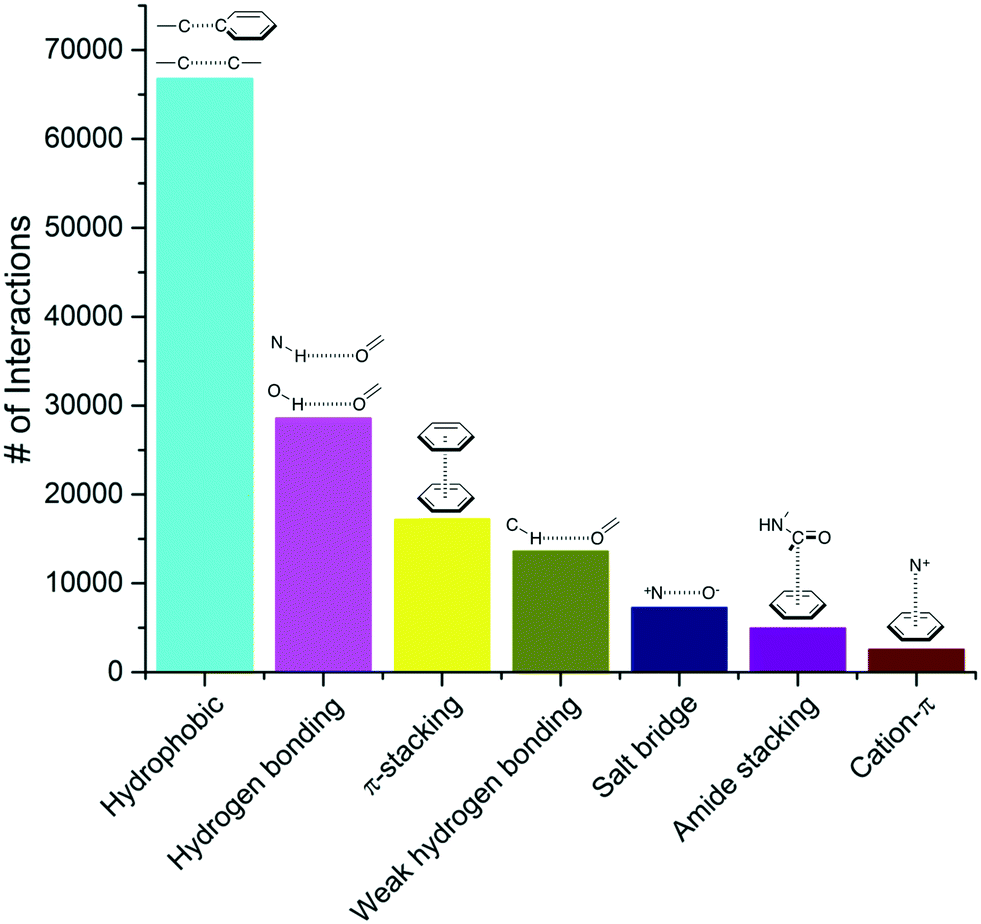

タンパク質ーリガンド相互作用を自動的に評価するプログラムはいくつかあります。最も人気のあるプログラムの一つは[PLIP](https://plip.biotec.tu-dresden.de/plip-web/plip/index)で、Webサーバーが公に利用可能で無料で使えるPythonライブラリがあるというのが人気の理由です。文献に付随する[supporting information](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4489249/bin/supp_gkv315_nar-00254-web-b-2015-File003.pdf)はタンパク質ーリガンド相互作用を簡潔に解説しており、非常に簡単に理解できるようになっています。導入としては、次のパラグラフで十分でしょう。

> PLIPはタンパク質残基とリガンドの非共有結合性相互作用をみつけるためのルールベースのシステムを使っています。タンパク質とリガンドの接触している原子間の非共有結合性相互作用の特徴を見つけるために、特定の相互作用に寄与することができる化学官能基（例、水素結合のドナーに必要とされるもの）と相互作用の幾何学的特徴（例、距離と角度の閾値）についての文献に基づく情報を使います。各結合サイトについて、このアルゴリズムは最初に、特定の相互作用のパートナーとなりうるタンパク質とリガンドの原子、あるいは原子団を探します。ついで、相互作用を形成するタンパク質とリガンドの条件に適合したグループに対して幾何学的なルールが適用されます。

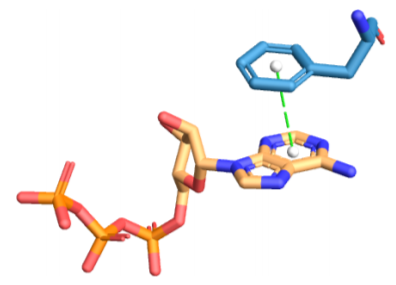

<center><i>PLIPのSIからのFigure。ここでは芳香族スタッキングが描かれています。</i></center>

より詳細な情報が必要なら、PDFドキュメントをチェックしてください！

In [1]:
# "ファイル > ライブPDFプレビューを使うためにこのNotebookを信頼する"をクリックする必要があるかもしれません
import requests
from IPython.display import HTML
pdf = "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4489249/bin/supp_gkv315_nar-00254-web-b-2015-File003.pdf"
display(HTML(f"""
<iframe src="https://docs.google.com/viewer?url={pdf}&embedded=true"
     frameborder="0" webkitallowfullscreen mozallowfullscreen 
     allowfullscreen width="900" height="600">
</iframe>
"""))

### 偽陽性

ドッキングソフトウェアは最終的な答えをあたえるものではありません！全ての結果は厳密に検証しなければなりません。例えば、このレビュー[L.Yang, J.Zhang, X.Che, Y.Q.Gao, in Methods in Enzymology, 2016](https://www.sciencedirect.com/science/article/pii/S0076687916300660) では次の指摘がなされています。

>タンパク質ーリガンド相互作用の研究においては、リガンドの自由度も重要な役割を果たす可能性があります。しかしながら、リガンド/タンパク質相互作用の研究においては、通常非常に限られた数のコンフォメーションしか考慮されません。一方で、リガンド/基質ータンパク質の相互作用を調べ、予測する上で、リガンドのコンフォメーションの集合を徹底的に調べることが極めて重要であることを示す例が増えています。さらに、構造ベースの医薬品デザインにおいて、テストされたリガンドのコンフォメーションが続いて行う計算の基礎となります。特に、リガンドは作用するタンパク質に結合する前と結合した後で、非常に異なるコンフォメーションをとることがあり、多くのリガンドが局所最小エネルギーのコンフォメーションではタンパク質に結合していないことを示す証拠があります。そのような場合、自由なリガンド単体のコンフォメーションの不適切な解析は、誤った結合エネルギー予測につながり、さらに酵素反応が含まれている場合には問題となる可能性があります。したがって、自由なリガンド単体の溶液中の構造を徹底的にサンプリングすることが必要で、それは適切な強化されたサンプリング手法と組み合わせたMDシミュレーションによって費用対効果良く実現することができます。

これはありうる失敗する点のうちの一つです。

***

## 実践

### 結果の可視化[<sup>脚注1</sup>](#id_01)

`nglview`を使いましょう！Webベースの分子ビューワーでJupyter Notebook上で実行することができます！また、ボックスから取り出した`PDBQT`ファイルとも互換性があります（が、最初のモデルだけしか読み込みません。。。これをどうするかは後ほどとりあげます）。

`nglview`をインストールするには次を実行してください。

ノートブックでインタラクティブなGUIを作成するために`ipywidgets`を使います。これにより、異なるリガンドをクリックし、クリックに応じてビューワーが更新されるようになります。特に、我々の小さなGUIには以下のことをさせたいと思います。

- Vinaの出力で報告されているように、ポーズと親和性のリストを表示する  
- タンパク質構造をリボン表示、リガンドを Ball&Stick、そして周りの残基をlicorice(Stickのみ)で表示する  
- 3Dの可視化がユーザーによるリストの異なるポーズの選択に応答するようにする

つまり、私たちは次のことをする必要があります。

1. NGLビューワーが適切な描画をするよう呼び出す  
2. 結果のインタラクティブなテーブルを作成する（ヒント：`ipywidgets.Select`を使ってください）  
3. NGLビューワーとコミュニケーションできるイベントハンドラーを書く。つまりユーザーが新しいエントリをクリックすると、ディスプレイのリガンドと周囲の残基を更新するようにします（リボン表示は更新する必要がない）。

In [1]:
import pandas as pd
import time
import nglview as nv
# AppLayoutをつかうにはipywidgetsがv7.5+でなければなりません
from ipywidgets import AppLayout, Layout, Select, Button

_ColormakerRegistry()

Vinaの作成したPDBQTファイルはいくつかモデルを含んでいますが、`nglview`は最初のものしか解析しません。この問題を回避する方法は単純です。`ENDMDL`行が見つかる度にスプリットすることでファイルを各モデルに分割します。

In [2]:
def split_pdbqt(path):
    """
    複数のモデルのPDBQTを別々のファイルに分けます
    """
    files = []
    with open(path) as f:
        lines = []
        i = 0
        for line in f:
            lines.append(line)
            if line.strip() == 'ENDMDL':
                fn = f'data/results.{i}.pdbqt'
                with open(fn, 'w') as o:
                    o.write(''.join(lines))
                files.append(fn)
                i += 1
                lines = []
    return files

Vinaの出力は結果のテーブルを含む単純なテキストファイルです。テーブルの解析は比較的簡単です。必要であれば、単純な可視化のために`pandas.DataFrame`を返します。

In [3]:
def parse_output(out):
    """
    Vina出力ファイルからDataFrameを作成します
    """
    with open(out) as f:
        data = []
        for line in f:
            if line.startswith('-----+'):
                line = next(f)
                while line.split()[0].isdigit():
                    index, *floats = line.split()
                    data.append([int(index)] + list(map(float, floats)))
                    line = next(f)
    return pd.DataFrame.from_records(data, 
                                     columns=['Mode', 'Affinity (kcal/mol)', 'RMSD (l.b.)', 'RMSD (u.b.)'], 
                                     exclude=['Mode'])

#### Vinaの出力を解析

作成した関数をつかって次のテキストファイルを…

In [4]:
# !cat data/vina.out 
# T11bでオンラインの取得がうまくいかなかったためローカル環境で
# AutoDock Vinaを実施した結果を用いています。
!cat data/local_vina.out

#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 4 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 267

綺麗にフォーマットされた`pandas.DataFrame`に変換することができます。

In [5]:
# parse_output("data/vina.out")
parse_output("data/local_vina.out")

Affinity (kcal/mol)  RMSD (l.b.)  RMSD (u.b.)
0                 -6.8        0.000        0.000
1                 -6.8        5.072        7.461
2                 -6.7        5.243        7.469
3                 -6.6        4.035        6.317
4                 -6.6        6.833        8.653
5                 -6.6        8.876       10.836
6                 -6.5        7.611        9.316
7                 -6.5        1.094        2.109
8                 -6.5        7.680        9.301

Vinaの出力には３つの列があります。

1. 予測された結合親和性  
2. 対称性修正アルゴリズム（symmetry-corrected algorithm）を使った最良の解（親和性最小値）に対するRMSD
3. 対称性修正（symmetry correction）を用いていない最良の解（親和性最小値）に対するRMSD

私たちは親和性にだけ興味があるので、次のセルでは`pandas.DataFrame`のために列を一つだけ取得しています。[<sup>脚注2</sup>](#id_02)

***

それでは、NGLビューワーのインスタンスを作成します。各タンパク質ーポーズのペアについて新しいインスタンスを作成する代わりに、同じ描画面を通して再利用し、必要なリガンドを隠すか表示します。最初に全てを読み込み、リガンドをそれぞれの親和性でラベルづけします。ビューワーに読み込まれた各分子を「component」とよびます。最初にタンパク質を読み込むので、`component_0`となります。リガンドは`component_1`から始まり続いていきます。

In [6]:
import time
def create_viewer(protein, ligands, affinities):
    """
    タンパク質と親和性のラベルをつけた全てのリガンドをもつnglview widgetを作成します
    """
    viewer = nv.NGLWidget()
    viewer.add_component(protein, ext="mol2")
    # 親和性のラベルを有する分子(@0)の最初の原子を選択します
    label_kwargs = dict(labelType="text", sele="@0", showBackground=True, backgroundColor="black")
    for ligand, affinity in zip(ligands, affinities):
        ngl_ligand = viewer.add_component(ligand, ext="pdbqt")
        ngl_ligand.add_label(labelText=[str(affinity)], **label_kwargs)
    return viewer

そして最後に、次の下のセルで実際のGUIを作成します！

`ipywidgets.AppLayout`レイアウトを使って水平に配置された２つのwidgetsからなります。

- セレクター（`ipywidgets.Select`）
- NGLビューワーそのもの

ユーザーがセレクターで新しいエントリーをクリックすると、`_on_selection_change`が呼ばれ以下のことを行います。

1. 新しい値が前のものと異なるかを確認します。異なる場合、次に…
2. 全てのリガンドを隠しビューをリセットします  
3. 選択したものを表示し、500msの格好いいアニメーションとともにカメラの中心に合わせます
4. 新しいポーズの重心の5Å内にある残基のリストを更新するためにNGLビューワーにJavaScriptを実行します。


In [7]:
# Python widgetからは隠されているので、
# リガンドの周りの残基を更新するにはJavaScriptのコードが必要です。
# http://nglviewer.org/ngl/api/manual/snippets.html に基づきます
_RESIDUES_AROUND = """
var protein = this.stage.compList[0];
var ligand_center = this.stage.compList[{index}].structure.atomCenter();
var around = protein.structure.getAtomSetWithinPoint(ligand_center, {radius});
var around_complete = protein.structure.getAtomSetWithinGroup(around);
var last_repr = protein.reprList[protein.reprList.length-1];
protein.removeRepresentation(last_repr);
protein.addRepresentation("licorice", {{sele: around_complete.toSeleString()}});
"""

def show_docking(protein, ligands, vina_output):
    # 複数のPDBQTリガンドファイルを別々のファイルに分割する
    ligands_files = split_pdbqt(ligands)
    # 親和性（'Affinity'）の取得（DataFrameのこの列だけが必要です）
    affinities = parse_output(vina_output)['Affinity (kcal/mol)']
                                
    # viewer widgetの作成
    viewer = create_viewer(protein, ligands_files, affinities)
    
    # selection widgetの作成
    #   オプションは(text, value)のタプルのリストです。select上でクリックすると、
    #   `.observe(...)`に登録されている呼び出し可能なもの(callable)にvalueが渡されます。
    selector = Select(options=[(f"#{i} {aff} kcal/mol", i) for (i, aff) in enumerate(affinities, 1)],
                      description="",  rows=len(ligands_files), layout=Layout(width="auto"))
                 
    # GUI要素の配置
    # selectionボックスを左、viewerをウィンドウの残りの部分を占めるようにします。
    display(AppLayout(left_sidebar=selector, center=viewer, pane_widths=[1, 6, 1]))
    
    # これがイベントハンドラーです。ユーザーがselectionボックスでクリックした時に動作を取り出します。
    # viewerの変数を「見る」ことができるようにここで定義する必要があります。
    def _on_selection_change(change):
        # ユーザーが異なるエントリーでクリックした時だけ更新する
        if change['name'] == 'value' and (change['new'] != change['old']):
            viewer.hide(list(range(1,len(ligands_files) + 1)))  # 全てのリガンドを隠す（components 1-n）
            component = getattr(viewer, f"component_{change['new']}")
            component.show()  # 選択した一つを表示
            component.center(500)  # viewをズームする
            # リガンド周りの残基を表示するためにJSコードを呼ぶ
            viewer._execute_js_code(_RESIDUES_AROUND.format(index=change['new'], radius=5))
    
    # イベントハンドラーの登録
    selector.observe(_on_selection_change)
    # 最初の解に焦点をあてるために手動でイベントを起こす
    _on_selection_change({'name': 'value', 'new': 1, 'old': None})

    return viewer

上の関数ではPythonの応用をいくつか行なっています。もし興味があれば、下のヘッダーをクリックしてより詳細について見ることができます。

<br />

<details>
    
<summary>Python応用の説明</summary>
    
> 最初に、JavaScriptとPythonのコードを混ぜていることに気づいたかもしれません！これは`NGLViewer.Viewer._execute_js_code`で提供されているように、`ipywidgets`の基盤のおかげで可能になっています。ここで（JavaScriptのコードを含む）文字列を渡しておくと、後でNGL widgetのスコープで実行されます（`this`はインタラクティブな描画面を差します）。パラメーター化するために、`_on_selection_change`を呼ぶ度にフォーマット化されるテンプレート・プレースホルダーを追加しました。
>
> この関数`_on_selection_change`がユーザーのインタラクション（selectionボックス上でのクリック）をPythonの世界と繋げる糊の役割を果たします。selectionボックス上でクリックする度ごとに呼ばれ、引数`change`を一つもちます。イベントのタイプと新旧両方の値を保持する辞書です（したがって比較し、それを取りあつかうことができます）。しかしながら、`vewer`を関数に含める必要もあります…そして、[追加の値を渡すことはできません](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html#Traitlet-events)！
>
> 関数で`viewer`を使えるようにする一つの方法は`show_docking`関数にその定義をネストすることです。そうすることで、Notebookの(global)scopeの中を探す必要なく外側の領域にアクセすることができるようになります。 [このポストでscopeとclosureについて情報をもっと](https://medium.com/@dannymcwaves/a-python-tutorial-to-understanding-scopes-and-closures-c6a3d3ba0937)見ることができます。

</details>



#### ドッキング結果を見る

In [8]:
# viewer = show_docking("data/protein.mol2", "data/results.pdbqt", "data/vina.out")
viewer = show_docking("data/protein.mol2", "data/local_result.pdbqt", "data/local_vina.out")

AppLayout(children=(Select(layout=Layout(grid_area='left-sidebar', width='auto'), options=(('#1 -6.8 kcal/mol'…

In [9]:
viewer.render_image(),

(Image(value=b'', width='99%'),)

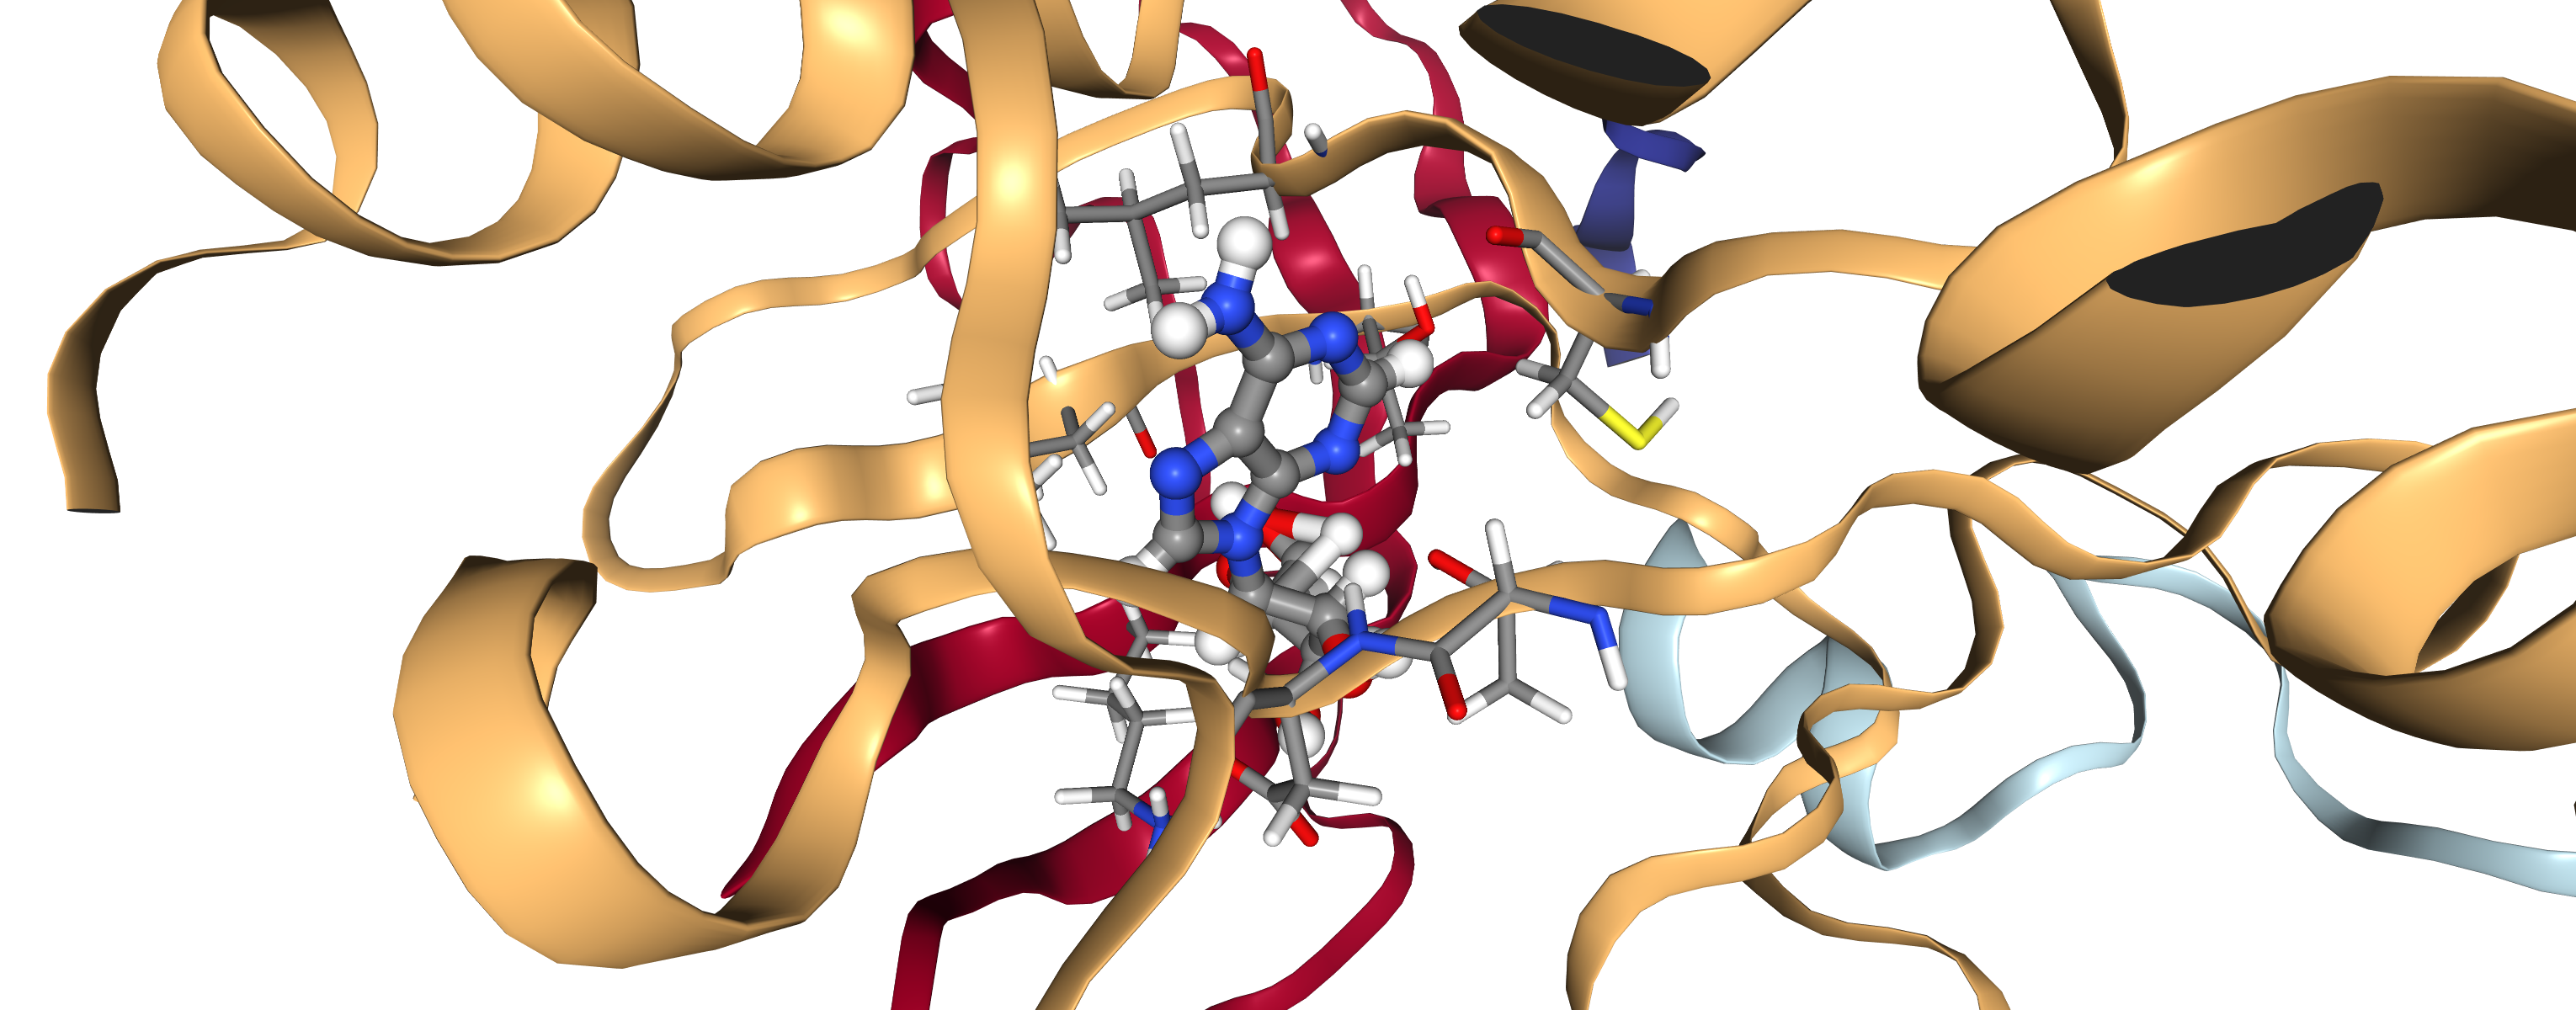

In [10]:
# 静的な出力
viewer._display_image()

In [11]:
import time
time.sleep(10)

### タンパク質ーリガンド相互作用の解析

PLIPは自動化された解析のための[Webサーバー](https://projects.biotec.tu-dresden.de/plip-web/plip) を提供していますが、残念ながらAPIはありません。標準のWeb UIを使っているかのようにHTML形式を使ってみることもできますが、ライブラリ自体がPython-3で使えるように準備されており、`pip`で簡単にインストールすることができるので、簡単のためローカルで使うことができます。

In [12]:
from plip.modules.preparation import PDBComplex
from plip.modules.report import BindingSiteReport
from glob import glob
import os
import pandas as pd

PILIPはPDBファイルだけを受け入れますが、PDBQTファイルはPDBの拡張された記法なので、相互の変換は列とレコードのうち正しい部分を選択するだけの問題です。この場合、`ATOM`（タンパク質原子）と`HETATM`（リガンド原子）レコードにだけ興味があるので、追加のフィールド（`66`列以降）を廃棄します。ついで、単に連結を行うだけでそれらを合わせてまとめることができます。

In [13]:
def pdbqt_to_pdbblock(pdbqt):
    lines = []
    with open(pdbqt) as f:
        for line in f:
            if line[:6] in ('ATOM  ', 'HETATM'):
                lines.append(line[:67].strip())
    return '\n'.join(lines)

def create_protein_ligand_pdbs(protein_pdbqt, ligands_pdbqt):
    ligands_pdbqt = sorted(list(glob(ligands_pdbqt)), key=lambda s: int(s.split('.')[-2]))
    protein_pdbblock = pdbqt_to_pdbblock(protein_pdbqt)
    for i, ligand_pdbqt in enumerate(ligands_pdbqt, 1):
        ligand_pdbblock = pdbqt_to_pdbblock(ligand_pdbqt)
        with open(f"data/docked_protein_ligand.{i}.pdb", 'w') as f:
            f.write(protein_pdbblock)
            f.write("COMPND    UNNAMED\n")
            f.write(ligand_pdbblock)

ジャジャーン!できました！

In [14]:
create_protein_ligand_pdbs("data/protein.mol2.pdbqt", "data/results.*.pdbqt")

これでPDBファイルをPLIPに渡し、その魔法が使えるようになりました。`BindingSiteReport`クラスは`PDBComplex`の検出された各結合サイトを処理し、興味のあるフィールドをもつオブジェクトを作成します。

- `hydrophobic`
- `hbond`
- `waterbridge`
- `saltbridge`
- `pistacking`
- `pication`
- `halogen`
- `metal`

これらのフィールドは（列名を保持する）`<field>_features`と（実際のレコードを保持する）`<field>_info`に分けられます。オブジェクトを順に処理して`getattr()`で正しい属性（attribute）の名前を取得すれば、概要をよくみるために`pandas.DataFrame`に渡す辞書を構成することができます。以下をチェックしてください。[<sup>脚注3</sup>](#id_03)

In [15]:
def analyze_interactions(pdbfile):
    protlig = PDBComplex()
    protlig.load_pdb(pdbfile)  # pdbの読み込み
    for ligand in protlig.ligands:
        protlig.characterize_complex(ligand)  # リガンドを見つけ相互作用を解析する
    sites = {}
    for key, site in sorted(protlig.interaction_sets.items()):
        binding_site = BindingSiteReport(site)  # 相互作用に関するデータをあつめる
        # *_featuresと*_infoのタプルをpandas dfに変換します
        keys = "hydrophobic", "hbond", "waterbridge", "saltbridge", "pistacking", "pication", "halogen", "metal"
        interactions = {k: [getattr(binding_site, k+"_features")] + getattr(binding_site, k+"_info") for k in keys}
        sites[key] = interactions
    return sites

In [17]:
interactions_by_site = analyze_interactions("data/docked_protein_ligand.1.pdb")
interactions_by_site

{'A:A:1': {'hydrophobic': [('RESNR',
    'RESTYPE',
    'RESCHAIN',
    'RESNR_LIG',
    'RESTYPE_LIG',
    'RESCHAIN_LIG',
    'DIST',
    'LIGCARBONIDX',
    'PROTCARBONIDX',
    'LIGCOO',
    'PROTCOO')],
  'hbond': [('RESNR',
    'RESTYPE',
    'RESCHAIN',
    'RESNR_LIG',
    'RESTYPE_LIG',
    'RESCHAIN_LIG',
    'SIDECHAIN',
    'DIST_H-A',
    'DIST_D-A',
    'DON_ANGLE',
    'PROTISDON',
    'DONORIDX',
    'DONORTYPE',
    'ACCEPTORIDX',
    'ACCEPTORTYPE',
    'LIGCOO',
    'PROTCOO'),
   (45,
    'LYS',
    'A',
    1,
    'A',
    'A',
    True,
    '2.64',
    '3.42',
    '133.60',
    True,
    431,
    'N3+',
    2953,
    'O3',
    (3.232, 17.45, 38.708),
    (4.782, 15.554, 36.326)),
   (150,
    'ASP',
    'A',
    1,
    'A',
    'A',
    False,
    '3.07',
    '3.43',
    '102.37',
    True,
    1470,
    'Nam',
    2955,
    'O3',
    (1.743, 18.722, 37.254),
    (0.523, 19.864, 34.258)),
   (45,
    'LYS',
    'A',
    1,
    'A',
    'A',
    False,
    '2.66',


この辞書は２つのレベルからなります。最初のレベルは見つかった結合サイトです。一つのリガンドだけをドッキングしているので、一つだけ見つかることが予想されます。各結合サイトについて、８個のリストを含むもう一つの辞書があり、リストは各特定の相互作用のためのものです。各リストは最初の列に列名を持ち、つづいて（該当するものがあれば）データが格納されています。これを踏まえて、次のように`Pandas.DataFrame`を構築することができます。

In [19]:
# オリジナルのノートブックと異なる解析結果を利用しているため、結合サイトの名前も異なっています。
# 結果に合わせてオリジナルのコード ["UNL:Z:1"] を['A:A:1']に変更しました。
# df = pd.DataFrame.from_records(interactions_by_site["UNL:Z:1"]["hbond"][1:], # データは列名の後に格納されています。
#                                columns=interactions_by_site["UNL:Z:1"]["hbond"][0]) # 列名は常に最初の要素です。

df = pd.DataFrame.from_records(interactions_by_site["A:A:1"]["hbond"][1:], 
                               columns=interactions_by_site["A:A:1"]["hbond"][0]) 

df

RESNR RESTYPE RESCHAIN  RESNR_LIG RESTYPE_LIG RESCHAIN_LIG  SIDECHAIN  \
0     45     LYS        A          1           A            A       True   
1    150     ASP        A          1           A            A      False   
2     45     LYS        A          1           A            A      False   
3     72     LEU        A          1           A            A      False   
4     61     MET        A          1           A            A      False   
5    149     THR        A          1           A            A       True   
6    150     ASP        A          1           A            A       True   

  DIST_H-A DIST_D-A DON_ANGLE  PROTISDON  DONORIDX DONORTYPE  ACCEPTORIDX  \
0     2.64     3.42    133.60       True       431       N3+         2953   
1     3.07     3.43    102.37       True      1470       Nam         2955   
2     2.66     3.10    106.87       True       422       Nam         2951   
3     3.65     4.01    103.83       True       694       Nam         2945   
4     2.75     3.76    161.43      False      2945       Npl          595   
5     2.02     2.89    147.03      False      2955        O3         1467   
6     2.70     3.64    162.21      False      2953        O3         1478   

  ACCEPTORTYPE                   LIGCOO                  PROTCOO  
0           O3   (3.232, 17.45, 38.708)  (4.782, 15.554, 36.326)  
1           O3  (1.743, 18.722, 37.254)  (0.523, 19.864, 34.258)  
2           O3  (5.392, 21.015, 40.948)  (7.994, 19.469, 41.639)  
3          Npl  (3.257, 24.961, 34.128)  (2.841, 27.919, 36.804)  
4           O2  (3.257, 24.961, 34.128)  (2.892, 28.611, 33.325)  
5           O3  (1.743, 18.722, 37.254)  (0.131, 21.066, 36.729)  
6           O3   (3.232, 17.45, 38.708)  (1.632, 16.073, 35.738)

さて、これらの相互作用をNGLビューワーで表しましょう。相互作用ポイント（`pandas.DataFrame`の`LIGCOO`と`PROTCOO`）の間に円柱（cylinder）を描き、`color_map`に表されているように色分けします（RGBタプルを使います）。

In [21]:
color_map = {
    'hydrophobic': [0.90, 0.10, 0.29],
    'hbond': [0.26, 0.83, 0.96],
    'waterbridge': [1.00, 0.88, 0.10],
    'saltbridge': [0.67, 1.00, 0.76],
    'pistacking': [0.75, 0.94, 0.27],
    'pication': [0.27, 0.60, 0.56],
    'halogen': [0.94, 0.20, 0.90],
    'metal': [0.90, 0.75, 1.00],
}

def show_docking_and_interactions(protein, ligands, vina_output):
    # 複数のPDBQTリガンドファイルを別々のファイルに分割します
    ligands_files = split_pdbqt(ligands)
    # 親和性（'Affinity'）を取得します（ DataFrameのこの列だけが必要です）
    affinities = parse_output(vina_output)['Affinity (kcal/mol)']
                                
    # selection widgetの作成
    #   オプションは(text, value)のタプルのリストです。select上でクリックすると、
    #   `.observe(...)`に登録されている呼び出し可能なもの(callable)にvalueが渡されます。
    selector = Select(options=[(f"#{i} {aff} kcal/mol", i-1) for (i, aff) in enumerate(affinities, 1)],
                      description="",  rows=len(ligands_files), layout=Layout(width="auto"))
    
                 
    # GUI要素の配置
    # selectionボックスを左、viewerをウィンドウの残りの部分を占めるようにします。
    app = AppLayout(left_sidebar=selector, center=None, pane_widths=[1, 6, 1], height="600px")

    # これがイベントハンドラーです。ユーザーがselectionボックスでクリックした時に動作を取り出します。
    # viewerの変数を「見る」ことができるようにここで定義する必要があります。
    def _on_selection_change(change):
        # ユーザーが異なるエントリーでクリックした時だけ更新する
        if change['name'] == 'value' and (change['new'] != change['old']):
            if app.center is not None:
                app.center.close()

            # NGLビューワー
            app.center = viewer = nv.NGLWidget(height="600px", default=True, gui=True)
            prot_component = viewer.add_component(protein, ext="pdbqt") # add protein
            time.sleep(1)
            lig_component = viewer.add_component(ligands_files[change['new']], ext="pdbqt") # add selected ligand
            time.sleep(1)
            lig_component.center(duration=500)

            # 相互作用の追加
            interactions_by_site = analyze_interactions(f"data/docked_protein_ligand.{change['new']+1}.pdb")
            interacting_residues = []                                    
            for site, interactions in interactions_by_site.items():
                for interaction_type, interaction_list in interactions.items():
                    color = color_map[interaction_type]
                    if len(interaction_list) == 1:
                        continue
                    df_interactions = pd.DataFrame.from_records(interaction_list[1:], columns=interaction_list[0])
                    for _, interaction in df_interactions.iterrows():
                        name = interaction_type
                        viewer.shape.add_cylinder(interaction['LIGCOO'], interaction['PROTCOO'], color, [0.1], name) 
                        interacting_residues.append(interaction['RESNR'])
            # 相互作用する残基の表示
            res_sele = " or ".join([f"({r} and not _H)" for r in interacting_residues])
            res_sele_nc = " or ".join([f"({r} and ((_O) or (_N) or (_S)))" for r in interacting_residues])
            prot_component.add_ball_and_stick(sele=res_sele, colorScheme="chainindex", aspectRatio=1.5)
            prot_component.add_ball_and_stick(sele=res_sele_nc, colorScheme="element", aspectRatio=1.5)
                                                        
                                                        
    # イベントハンドラーの登録
    selector.observe(_on_selection_change)
    # 最初の解に焦点をあてるために手動でイベントを起こす
    _on_selection_change({'name': 'value', 'new': 1, 'old': None})

    return app


`show_docking_and_interactions` はほとんど`show_docking`関数とと同じですが、各選択イベントについてPLIP相互作用も計算します。この場合、イベントハンドラーはもう少しだけ関与しています。相互作用を示す円筒を手動で消すことができないので、各選択イベントについてNGLビューワーを作り直す必要があります。ですが、今回はJavaScriptは含まれていません。純粋なPythonだけです。ですが、ビューワーのwidgetを初めから作り直し、分子を読み込み、相互作用を計算するにはより時間が必要となり、体感としてはそれほどダイナミックなものにはなりません。

#### ドッキングと相互作用の表示

In [25]:
# app = show_docking_and_interactions("data/protein.mol2.pdbqt", "data/results.pdbqt", "data/vina.out")
app = show_docking_and_interactions("data/protein.mol2.pdbqt", "data/local_result.pdbqt", "data/local_vina.out")
app

AppLayout(children=(Select(layout=Layout(grid_area='left-sidebar', width='auto'), options=(('#1 -6.8 kcal/mol'…

In [26]:
app.center.render_image(),

(Image(value=b'', width='99%'),)

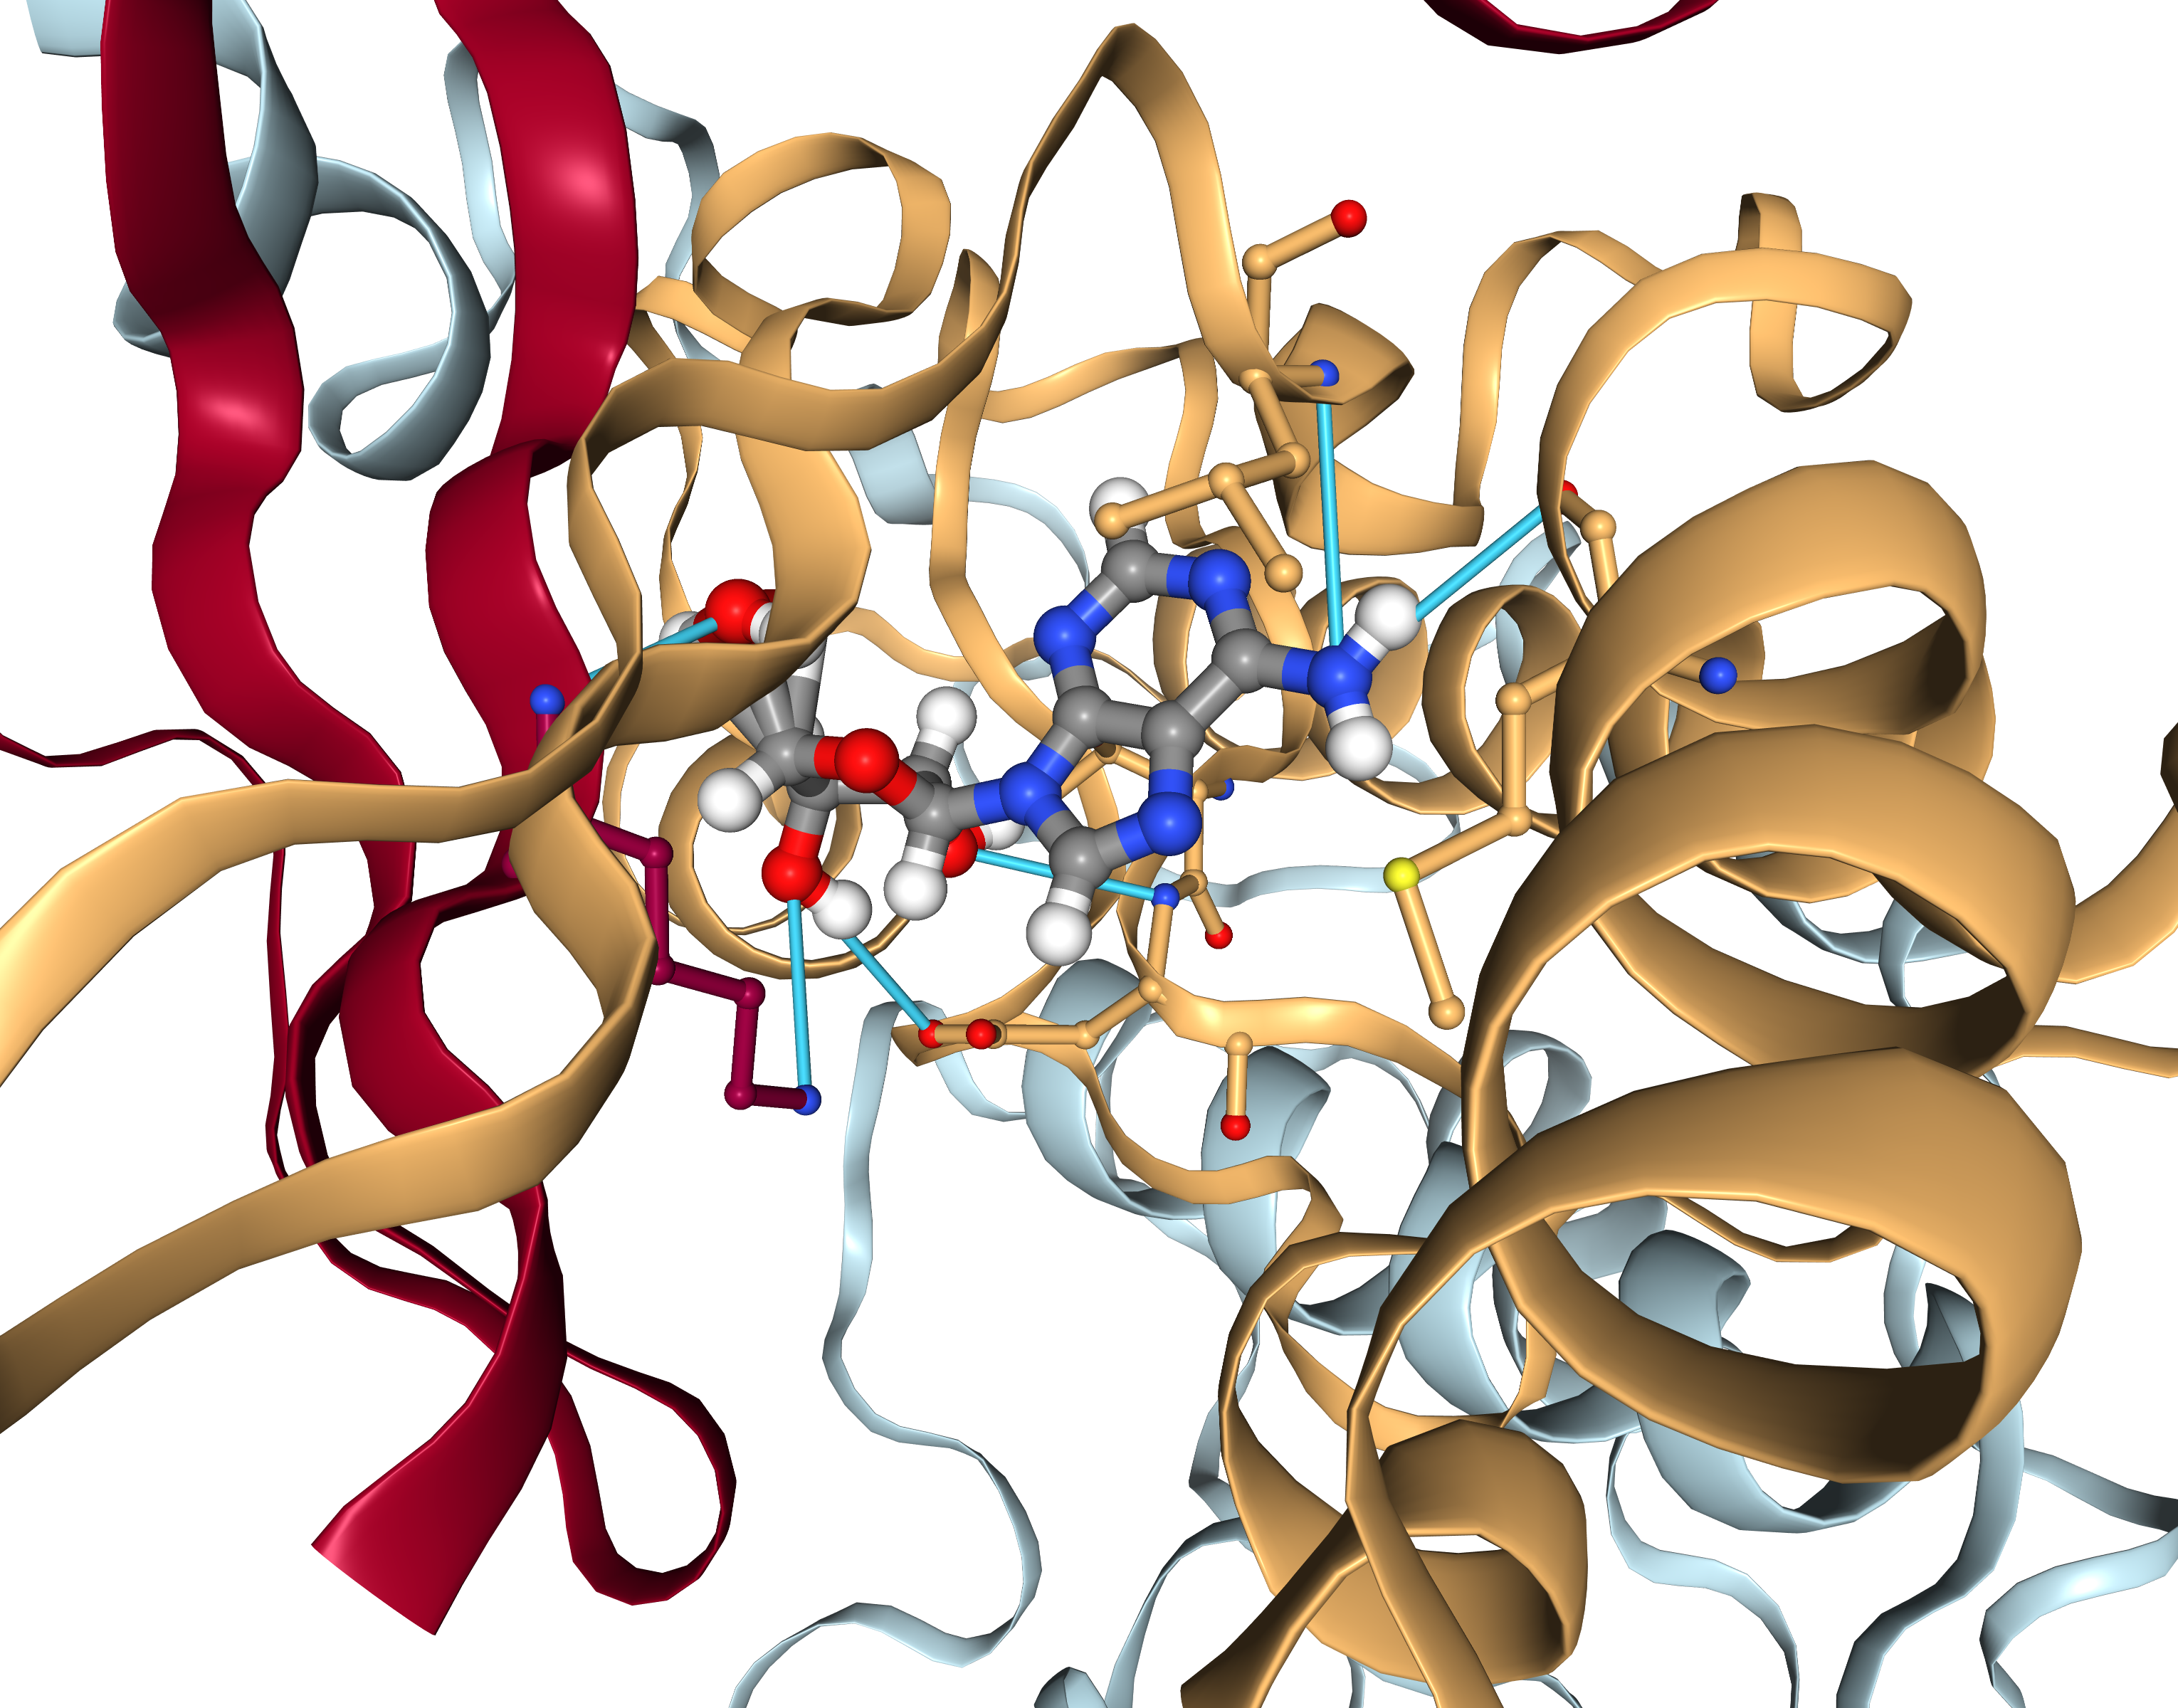

In [27]:
# 静的なプレビュー
app.center._display_image()

## ディスカッション

このトークトリアルの最後のパートでは、Vinaによるドッキングの結果を可視化し解析する方法を学びました。他のパートと異なり、このNotebookはローカル環境で実行され、Webサーバーは呼びませんでした。しかしながら、とてもたくさんのWebテクノロジーを取り扱っており、主にNGLビューワーと`ipywidgets`レイアウトに基づいています。

はじめに、選択したタンパク質ーリガンドポーズとその周囲でインタラクティブにビューワーを更新するために(`observe()`で登録されているように）イベントハンドラーを使いました。次に、ビューワーで相互作用を描くためにPLIPの自動化された解析を使って可視化を拡張しました。


## クイズ

- 観察したドッキング解析において最も重要だったのはどのような相互作用でしたか？文献との一致は見られましたか？またそれはなぜでしょうか？
- 疎水性相互作用と水素結合の間の主な違いは何でしょうか？またどの点で類似しているでしょうか？
- パートBで学んだ内容を応用してPLIPのWebサーバーを使う関数を描いてください。メインの`form`エントリーと`action`のエンドポイント、リクエストを投げるのに必要な`input`タグの場所を見つけるためにHTMLソースコードをチェックする必要があります。

## 脚注

以下は日本語訳における中です。

<span id="id_01">**脚注1**: トークトリアル11パートCではパートBで取得したドッキング結果の解析を行いますが、パートBで取り上げられているオンラインサービスはすでに利用できなくなっています。そのため、ここでは別途ローカルでAutoDockVinaのドッキングを実施し、結果を代わりに用いています。</span> 


<span id="id_02">**脚注2**: RMSDについてsymmetry correctionを行ったか否かの２種類の記述があります。以下は、私の理解です。  
リガンドの各原子を区別してラベルしている場合、分子に対称性があると、化学的には同じ構造でも原子のラベルとしては異なるという可能性があります（ex. ベンゼンの６つの炭素原子にラベルをつける場合）。ドッキングの結果の比較として、同じリガンドの異なる結合ポーズをRMSDで評価しようとする場合、各原子のラベルの対応を元に計算できます。ですが、対称性がある分子では、実際には重なりのよい（RMSDの小さい）ポーズでも、ラベルの付け方が複数通り可能なために原子同士が離れている（RMSDが大きくなる）と計算してしまいます。この問題を考慮するか否か、というのがsymmetry correctionを行うか否か、という違いだと思います。 </span> 


<span id="id_03">**脚注3**: MacOSを使用している場合、PLIPでPDBを読み込む際に下記のエラーが出る可能性があります。　　

```
    396     if os.name != 'nt':  # Resource module not available for Windows
    397         maxsize = resource.getrlimit(resource.RLIMIT_STACK)[-1]
--> 398         resource.setrlimit(resource.RLIMIT_STACK, (min(2 ** 28, maxsize), maxsize))
    399     sys.setrecursionlimit(10 ** 5)  # increase Python recoursion limit
    400     return readmol(pdbfname, as_string=as_string)
    
ValueError: current limit exceeds maximum limit   
```  
該当の箇所は`plip/modules/supplemental.py in read_pdb(pdbfname, as_string) in read_pdb(pdbfname, as_string)`で、使用するシステムのリソースを設定する箇所でのエラーです。こちらはMac OSとPython 3.6の組み合わせで生じる問題のようです。Pythonにissue（　[課題34602:python3 resource.setrlimit strange behaviour under macOS](https://bugs.python.org/issue34602) ）　が出ていました。PLIPの該当箇所をコメントアウトしGitHubの[修正履歴](https://github.com/python/cpython/pull/14549/commits)を参考に以下のように書き換えました。

```
def read_pdb(pdbfname, as_string=False):
    """Reads a given PDB file and returns a Pybel Molecule."""
    pybel.ob.obErrorLog.StopLogging()  # Suppress all OpenBabel warnings

    """エラー箇所
    if os.name != 'nt':  # Resource module not available for Windows
       maxsize = resource.getrlimit(resource.RLIMIT_STACK)[-1]
       resource.setrlimit(resource.RLIMIT_STACK, (min(2 ** 28, maxsize), maxsize))
    """

    # 変更ここから
    if sys.platform == 'darwin':
        try:
            import resource
        except ImportError:
            pass
        else:
            soft, hard = resource.getrlimit(resource.RLIMIT_STACK)
            newsoft = min(hard, max(soft, 1024*2048))
            resource.setrlimit(resource.RLIMIT_STACK, (newsoft, hard))
    # 変更ここまで
    
    sys.setrecursionlimit(10 ** 5)  # increase Python recoursion limit
    return readmol(pdbfname, as_string=as_string)
```

これでエラーが出なくなりました。 </span> 